In [1]:
from os import listdir
import face_detection as fd
from cv2 import imwrite, imread, resize
import matplotlib.pyplot as plt

In [2]:
mydir = 'C:\\Users\\mika\\Desktop\\Data Science\\Pictures Project\\'
imgdir = 'face_images\\'
resultdir = 'faces_detected\\'
cropdir = 'cropped_face_images\\'

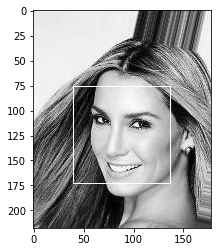

In [2]:
#list of all available files in the directory
files_list = listdir(mydir + imgdir)
#list of all files where a face was detected
images_with_faces = []
for file in files_list:
    img = fd.read(mydir + imgdir + file)
    if fd.is_face(img):
        images_with_faces.append(file[:6]+'.png')
        gray_face = fd.face_detect(img)
        imwrite(resultdir+file[:6]+'.png', gray_face)

#show the result
img = imread(mydir + resultdir + images_with_faces[0])
plt.imshow(img)
plt.show()
plt.close()

In [3]:
#image hashing
from myhash import myhash
pictures_hash = []
for file in images_with_faces:
    pictures_hash.append(myhash(resultdir + file))
print(pictures_hash[0])  

f9f1db9c1c1c0e06


In [ ]:
# croping an image by the detected face
for file in files_list:
    img = imread(mydir + imgdir + file)
    cropped = fd.crop(img)
    if cropped is not ():
        imwrite(cropdir + file, cropped)

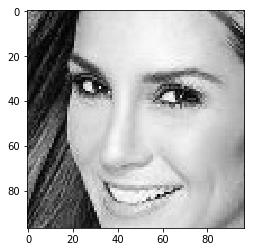

In [7]:
cr_files_list = listdir(mydir + cropdir)
#show the result
img = imread(mydir + cropdir + cr_files_list[0])
plt.imshow(img)
plt.show()
plt.close()

In [11]:
#count how many images are recognized as faces depending on the size of the image
sd = {}
total = len(cr_files_list)
for size in range(20, 101, 5):
    count = 0
    for file in cr_files_list:
        img = fd.read(mydir + cropdir + file)
        img = resize(img,(size,size))
        if not fd.is_face_sz(img,int(size/10)):
            count += 1
    sd[size] = count/total
    

In [12]:
print('original faces detected ', total)
print(sd)

original faces detected  951
{20: 1.0, 25: 1.0, 30: 0.2797055730809674, 35: 0.19242902208201892, 40: 0.20609884332281808, 45: 0.19242902208201892, 50: 0.1882229232386961, 55: 0.02103049421661409, 60: 0.015772870662460567, 65: 0.017875920084121977, 70: 0.012618296529968454, 75: 0.016824395373291272, 80: 0.008412197686645636, 85: 0.006309148264984227, 90: 0.007360672975814932, 95: 0.010515247108307046, 100: 0.00946372239747634}


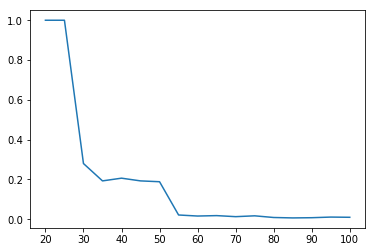

In [13]:
lists = sorted(sd.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.show()
plt.close()